<a href="https://colab.research.google.com/github/MarinaChau/IASD_classes/blob/master/Deep%20Learning%20Project/PGD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# Checking the number of rows (records) and columns (features)
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Checking the number of unique classes 
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

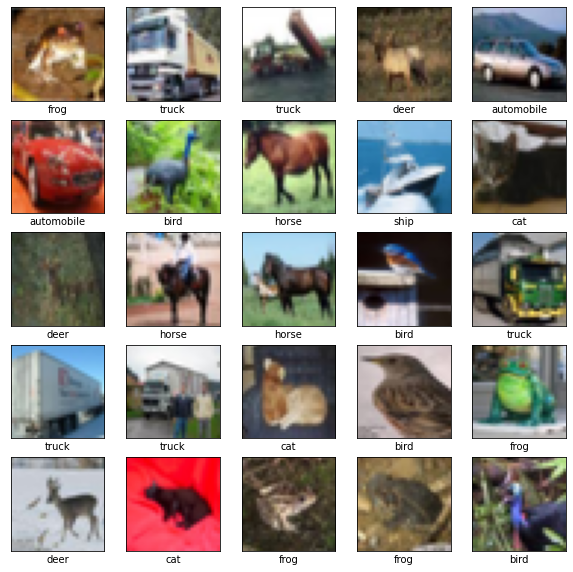

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (25):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
# Converting the pixels data to float type
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
# Standardizing (255 is the total number of pixels an image can have)
train_images = train_images / 255
test_images = test_images / 255 

# One hot encoding the target class (labels)
num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## TRAIN SIMPLE MODEL

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(None, 32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=100,
                    validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 25s 16ms/step - loss: 1.7596 - accuracy: 0.3961 - val_loss: 1.2710 - val_accuracy: 0.5430
Epoch 2/100
782/782 [==============================] - 9s 11ms/step - loss: 1.1971 - accuracy: 0.5742 - val_loss: 0.9837 - val_accuracy: 0.6461
Epoch 3/100
782/782 [==============================] - 9s 11ms/step - loss: 0.9923 - accuracy: 0.6524 - val_loss: 0.9257 - val_accuracy: 0.6692
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 0.8858 - accuracy: 0.6903 - val_loss: 0.7253 - val_accuracy: 0.7464
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 0.8156 - accuracy: 0.7171 - val_loss: 0.7473 - val_accuracy: 0.7359
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7565 - accuracy: 0.7392 - val_loss: 0.7195 - val_accuracy: 0.7480
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7155 - accuracy: 0.7544 - val_loss: 0.6076 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

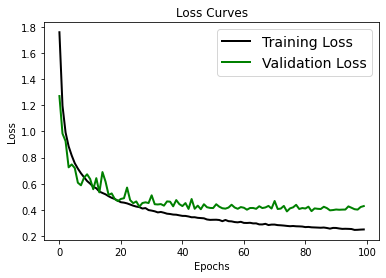

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

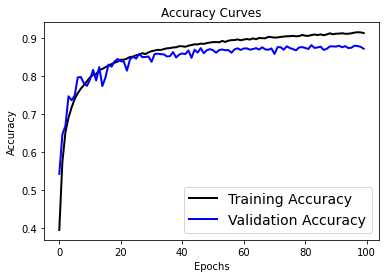

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

## SAVE MODEL

In [ ]:
model.save("simpleCifarmodel.h5")

## TRAIN WITH ADVERSERIAL ATTACK

In [ ]:
class_to_name = {
    0:	"T-shirt/top",
    1:	"Trouser",
    2:	"Pullover",
    3:	"Dress",
    4:	"Coat",
    5:	"Sandal",
    6:	"Shirt",
    7:	"Sneaker",
    8:	"Bag",
    9:	"Ankle boot"
}

def show_dataset_and_predictions(x, y, model):

  plt.figure(figsize=(16, 8))
  for i in range(0, 18):
      plt.subplot(3, 6, i + 1)
      plt.imshow(x[i], cmap="gray")
     # plt.text(0, 2, s=f"y_true={class_to_name[y[i]]}",
     #         bbox=dict(facecolor='blue', alpha=0.9),
    #        color="white")
      
      prediction = model.predict(np.expand_dims(x[i], 0))
      prediction = np.argmax(prediction)

      color = "green" if prediction == y[i] else "red"
      
      plt.text(0, 26, s=f"y_pred={class_to_name[prediction]}",
              bbox=dict(facecolor=color, alpha=0.9),
              color="white")

      plt.axis("off")
  plt.show()

ValueError: ignored

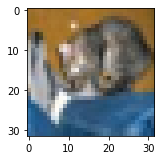

In [ ]:

show_dataset_and_predictions(test_images, test_labels, model)

In [ ]:
import tensorflow as tf

In [ ]:
def pgd(x, y, epsilon, num_iter, model=model):

  epsilon_iter = 10 * epsilon / num_iter

  x_attack = tf.convert_to_tensor(x)
  for _ in range(num_iter):
    with tf.GradientTape() as g: 
      g.watch(x_attack)
      p = model(x_attack)
      loss = tf.keras.backend.categorical_crossentropy(y, p)
      dloss_dx = g.gradient(loss, x_attack)
      gradient = np.sign(dloss_dx)
      x_attack = x_attack + epsilon_iter*gradient
      eta = tf.clip_by_value(x_attack - x, -epsilon, epsilon)
      x_attack = tf.clip_by_value(x+eta, 0, 255)

  return x_attack



In [ ]:
x_test = test_images
y_test = test_labels

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_attack = pgd(x_test[:10], y_test[:10], epsilon=0.002, num_iter=10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


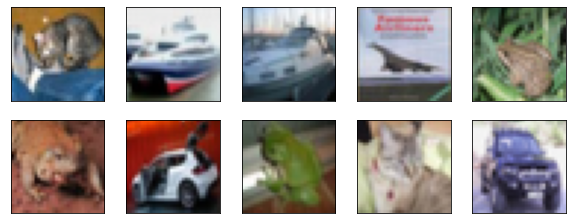

In [ ]:
# Visualizing some of the images from the training dataset
plt.figure(figsize=[10,10])
for i in range (10):    # for first 25 images
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_attack[i], cmap=plt.cm.binary)
  #plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
model.evaluate(x_attack, y_test[:10])

1/1 [==============================] - 0s 493ms/step - loss: 2.0675 - accuracy: 0.6000


[2.067493438720703, 0.6000000238418579]

## Adverserial training